In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타켓 :', data[1,0])
#print('이미지(28*28을 1차원으로) :', data[0, 1:].reshape(28,28))

타켓 : 0.0


In [5]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

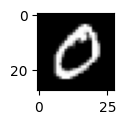

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [7]:
%pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/image.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 읽기
print(image_gray.shape)
print(type(image_gray))

(183, 275)
<class 'numpy.ndarray'>


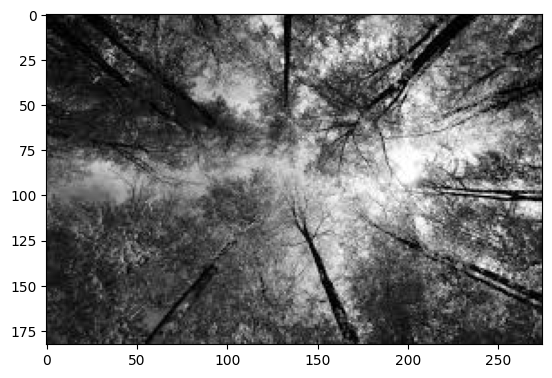

In [10]:
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

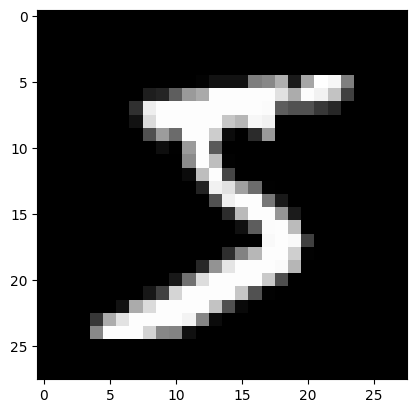

In [13]:
plt.imshow(X_train[0], cmap='gray')

In [14]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [15]:
# 학습셋(5만개:fit용), 검증셋(만:fit용), 테스트셋(만:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [16]:
# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [17]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [18]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[8 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# 2. 모델 구성

In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [20]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [21]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 0s 25ms/step - loss: 2.2983 - accuracy: 0.1114 - val_loss: 2.2947 - val_accuracy: 0.1033
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2776 - accuracy: 0.1200 - val_loss: 2.2847 - val_accuracy: 0.0867
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2619 - accuracy: 0.1086 - val_loss: 2.2767 - val_accuracy: 0.0800
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2488 - accuracy: 0.1086 - val_loss: 2.2676 - val_accuracy: 0.0833
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2351 - accuracy: 0.1071 - val_loss: 2.2551 - val_accuracy: 0.0833
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2229 - accuracy: 0.1057 - val_loss: 2.2451 - val_accuracy: 0.0800
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2105 - accuracy: 0.1043 - val_loss: 2.2377 - val_accuracy: 0.0800
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 3ms/step - loss: 1.9439 - accuracy: 0.2271 - val_loss: 2.0434 - val_accuracy: 0.2033
Epoch 60/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9406 - accuracy: 0.2257 - val_loss: 2.0409 - val_accuracy: 0.2067
Epoch 61/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9370 - accuracy: 0.2286 - val_loss: 2.0424 - val_accuracy: 0.2133
Epoch 62/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9343 - accuracy: 0.2286 - val_loss: 2.0396 - val_accuracy: 0.2067
Epoch 63/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9308 - accuracy: 0.2286 - val_loss: 2.0341 - val_accuracy: 0.2067
Epoch 64/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9281 - accuracy: 0.2286 - val_loss: 2.0326 - val_accuracy: 0.2067
Epoch 65/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9251 - accuracy: 0.2243 - val_loss: 2.0350 - val_accuracy: 0.2133
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 4ms/step - loss: 1.8156 - accuracy: 0.2671 - val_loss: 1.9754 - val_accuracy: 0.2300
Epoch 118/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8148 - accuracy: 0.2671 - val_loss: 1.9757 - val_accuracy: 0.2300
Epoch 119/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8128 - accuracy: 0.2657 - val_loss: 1.9717 - val_accuracy: 0.2267
Epoch 120/500
7/7 [==============================] - 0s 3ms/step - loss: 1.8116 - accuracy: 0.2671 - val_loss: 1.9750 - val_accuracy: 0.2333
Epoch 121/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8095 - accuracy: 0.2657 - val_loss: 1.9700 - val_accuracy: 0.2333
Epoch 122/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8079 - accuracy: 0.2671 - val_loss: 1.9696 - val_accuracy: 0.2333
Epoch 123/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8062 - accuracy: 0.2671 - val_loss: 1.9713 - val_accuracy: 0.2233
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.7378 - accuracy: 0.2829 - val_loss: 1.9523 - val_accuracy: 0.2333
Epoch 176/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7370 - accuracy: 0.2843 - val_loss: 1.9547 - val_accuracy: 0.2367
Epoch 177/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7355 - accuracy: 0.2829 - val_loss: 1.9522 - val_accuracy: 0.2400
Epoch 178/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7343 - accuracy: 0.2857 - val_loss: 1.9536 - val_accuracy: 0.2367
Epoch 179/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7332 - accuracy: 0.2871 - val_loss: 1.9532 - val_accuracy: 0.2367
Epoch 180/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7322 - accuracy: 0.2900 - val_loss: 1.9545 - val_accuracy: 0.2400
Epoch 181/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7315 - accuracy: 0.2886 - val_loss: 1.9499 - val_accuracy: 0.2333
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.6796 - accuracy: 0.3114 - val_loss: 1.9429 - val_accuracy: 0.2567
Epoch 234/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6785 - accuracy: 0.3100 - val_loss: 1.9480 - val_accuracy: 0.2667
Epoch 235/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6776 - accuracy: 0.3114 - val_loss: 1.9457 - val_accuracy: 0.2600
Epoch 236/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6766 - accuracy: 0.3129 - val_loss: 1.9452 - val_accuracy: 0.2567
Epoch 237/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6757 - accuracy: 0.3129 - val_loss: 1.9452 - val_accuracy: 0.2600
Epoch 238/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6748 - accuracy: 0.3114 - val_loss: 1.9448 - val_accuracy: 0.2667
Epoch 239/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6739 - accuracy: 0.3157 - val_loss: 1.9460 - val_accuracy: 0.2700
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.6332 - accuracy: 0.3329 - val_loss: 1.9490 - val_accuracy: 0.2733
Epoch 292/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6331 - accuracy: 0.3271 - val_loss: 1.9532 - val_accuracy: 0.2767
Epoch 293/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6317 - accuracy: 0.3329 - val_loss: 1.9473 - val_accuracy: 0.2667
Epoch 294/500
7/7 [==============================] - 0s 3ms/step - loss: 1.6316 - accuracy: 0.3343 - val_loss: 1.9497 - val_accuracy: 0.2700
Epoch 295/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6304 - accuracy: 0.3314 - val_loss: 1.9520 - val_accuracy: 0.2733
Epoch 296/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6298 - accuracy: 0.3314 - val_loss: 1.9466 - val_accuracy: 0.2633
Epoch 297/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6293 - accuracy: 0.3286 - val_loss: 1.9501 - val_accuracy: 0.2667
Epoch 298/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.5972 - accuracy: 0.3429 - val_loss: 1.9665 - val_accuracy: 0.2700
Epoch 350/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5962 - accuracy: 0.3400 - val_loss: 1.9567 - val_accuracy: 0.2733
Epoch 351/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5961 - accuracy: 0.3443 - val_loss: 1.9635 - val_accuracy: 0.2633
Epoch 352/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5955 - accuracy: 0.3386 - val_loss: 1.9610 - val_accuracy: 0.2667
Epoch 353/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5944 - accuracy: 0.3471 - val_loss: 1.9612 - val_accuracy: 0.2700
Epoch 354/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5938 - accuracy: 0.3457 - val_loss: 1.9620 - val_accuracy: 0.2667
Epoch 355/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5934 - accuracy: 0.3414 - val_loss: 1.9658 - val_accuracy: 0.2700
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.5661 - accuracy: 0.3486 - val_loss: 1.9791 - val_accuracy: 0.2667
Epoch 408/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5659 - accuracy: 0.3500 - val_loss: 1.9781 - val_accuracy: 0.2667
Epoch 409/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5652 - accuracy: 0.3500 - val_loss: 1.9794 - val_accuracy: 0.2667
Epoch 410/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5647 - accuracy: 0.3514 - val_loss: 1.9823 - val_accuracy: 0.2667
Epoch 411/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5644 - accuracy: 0.3529 - val_loss: 1.9773 - val_accuracy: 0.2567
Epoch 412/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5634 - accuracy: 0.3543 - val_loss: 1.9881 - val_accuracy: 0.2667
Epoch 413/500
7/7 [==============================] - 0s 3ms/step - loss: 1.5647 - accuracy: 0.3414 - val_loss: 1.9795 - val_accuracy: 0.2667
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.5395 - accuracy: 0.3643 - val_loss: 2.0050 - val_accuracy: 0.2600
Epoch 466/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5391 - accuracy: 0.3629 - val_loss: 2.0087 - val_accuracy: 0.2633
Epoch 467/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5386 - accuracy: 0.3600 - val_loss: 2.0045 - val_accuracy: 0.2600
Epoch 468/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5388 - accuracy: 0.3700 - val_loss: 2.0046 - val_accuracy: 0.2600
Epoch 469/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5380 - accuracy: 0.3600 - val_loss: 2.0104 - val_accuracy: 0.2567
Epoch 470/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5378 - accuracy: 0.3614 - val_loss: 2.0037 - val_accuracy: 0.2600
Epoch 471/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5376 - accuracy: 0.3614 - val_loss: 2.0141 - val_accuracy: 0.2600
Epoch 472/500
7/7 [========

# 5. 모델 평가하기

In [22]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

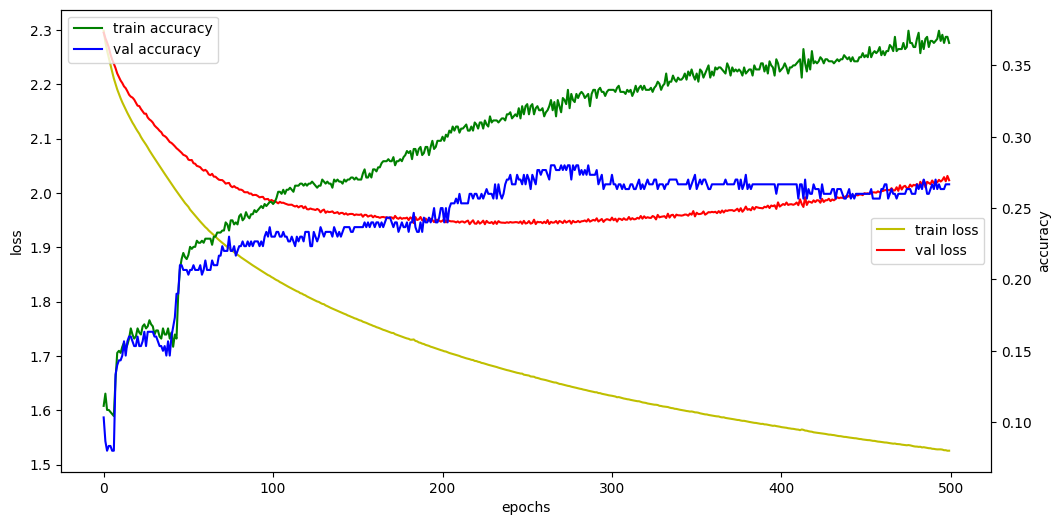

In [23]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [24]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.9944175481796265
accuracy : 0.24950000643730164


# ※ 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수relu계열, tanh)
- epoch 조정
- optimizer 변경

In [ ]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 700)
# val_idx  = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

Epoch 1/50
500/500 [==============================] - 6s 10ms/step - loss: 0.2680 - accuracy: 0.9171 - val_loss: 0.0987 - val_accuracy: 0.9688
Epoch 2/50
500/500 [==============================] - 5s 10ms/step - loss: 0.1222 - accuracy: 0.9629 - val_loss: 0.0885 - val_accuracy: 0.9742
Epoch 3/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0938 - accuracy: 0.9707 - val_loss: 0.0879 - val_accuracy: 0.9732
Epoch 4/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0777 - accuracy: 0.9757 - val_loss: 0.0855 - val_accuracy: 0.9772
Epoch 5/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0767 - val_accuracy: 0.9766
Epoch 6/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.0891 - val_accuracy: 0.9787
Epoch 7/50
500/500 [==============================] - 5s 11ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0968 - val_accuracy: 0.9740

In [ ]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [ ]:
# 실제값
test_Y.argmax(axis=1) == y_test

In [ ]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

In [ ]:
pd.crosstab(y_test, yhat)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

In [ ]:
# 틀린 갯수:
10000- 10000*loss_and_metrics[1]

In [ ]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

In [ ]:
# 모델 저장
model.save('model/08_mnist.h5')

# 콜백함수 1 : 로그 출력

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [ ]:
%%time
# 매 epoch마다 로그 출력하면 지저분 -> 특정 epoch마다 로그 출력하도록 제한
class CustomHistory(Callback) :
    def __init__(self) : # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10==0 :
            print("epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}" .\
                  format(self.epoch, 
                         logs.get('loss','-'),
                         logs.get('accuracy','-'),
                         logs.get('val_loss','-'),
                         logs.get('val_accuracy','-')
                        )
                 )


(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수


In [ ]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# ※ 콜백함수2 : EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [ ]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준 patience 이상 안좋은 데이터 발생 시 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2) 
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수

# ※ 콜백함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [ ]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준 patience 이상 안좋은 데이터 발생 시 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10) 
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder) : # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder) 
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, # 저장 경로
                             monitor='val_accuracy', # 모니터할 지표
                             save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                             mode='max', # 값이 클수록 저장
                             verbose=1 # 저장 시 로그 출력
                            )
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

In [ ]:
model.evaluate(val_X, val_Y)